<a href="https://colab.research.google.com/github/RobNewt/Data-Analysis/blob/master/Billboard_Top_100_(In_Progress).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Billboard Top 100

This dataset, available via Data.world, contains every weekly Hot 100 singles chart between 8/2/1958 and 12/28/2019 from Billboard.com. Each row of data represents a song and the corresponding position on that week's chart. Included in each row are the following elements:
1. Billboard Chart URL
2. WeekID
3. Song name
4. Performer name
5. SongID - Concatenation of song & performer
6. Current week on chart
7. Instance (this is used to separate breaks on the chart for a given song. Example, an instance of 6 tells you that this is the sixth time this song has appeared on the chart)
8. Previous week position
9. Peak Position (as of the corresponding week)
10. Weeks on Chart (as of the corresponding week)

Also available is a dataset containing each song's "audio features."

These include common attributes like genre as well as the following:
1. Danceability
2. Energy
3. Key
4. Loudness
5. Mode
6. Speechiness
7. Acousticness
8. Instrumentalness
9. Liveness
10. Valence
11. Tempo
12. Time Signature

Definitions of those terms are available at https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Here's an example:

Liveliness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.



I'm excited about this data set. In addition to already numeric things like tempo, the ability to measure things like instrumentalness and speechiness give us some fun quantative measurements to play around with. I find change over time interesting, so I think I'm curious to see how things like average length of time on chart, average length of time on chart for #1 songs, and similar metrics change over time.

After exploring all that, I have a little bit of machine learning I'd like to do with this data set. First, I'd like to use the features available in the second dataframe to see what clusters exist within these weekly top 100 songs. Then I'm curious to see if I can use features from both dataframes to predict when a song originated.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime
register_matplotlib_converters()
import seaborn as sns


# 1: Explore the Charts
Let's just explore the data sets, do some cleaning/preprocessing, and get a sense of what's in there.

In [0]:
df1= pd.read_csv("https://query.data.world/s/ywri3z52sryyglb3esstvexlw7hvl3")


In [54]:
print(len(df1))
df1.head()

320495


,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [0]:
df1['WeekID']=pd.to_datetime(df1['WeekID'], infer_datetime_format=True) #Let's convert WeekID to a date. Then it'll be easier to compare and sort with.

In [56]:
df1.isnull().sum()

url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    30784
Peak Position                 0
Weeks on Chart                0
dtype: int64

This is a really clean set. Those missing Previous Week Position values are all from songs appearing on the chart for the first time and shouldn't have a value there. I'm going to tidy this data by defining an observation to be the number of weeks a song was on the chart, it's peak position, and it's final Week ID

In [57]:
df1['Song']

0                                          Poor Little Fool
1                                             One Sweet Day
2         Candle In The Wind 1997/Something About The Wa...
3                                       Do I Make You Proud
4                                                         3
                                ...                        
320490                                     Jingle Bell Rock
320491                                     Jingle Bell Rock
320492                                     Jingle Bell Rock
320493                                     Jingle Bell Rock
320494                                     Jingle Bell Rock
Name: Song, Length: 320495, dtype: object

In [58]:
df1[df1['Song'] == 'Jingle Bell Rock'][:8]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
14317,http://www.billboard.com/charts/hot-100/1958-1...,1958-12-20,57,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,1,NaN,57,1
28510,http://www.billboard.com/charts/hot-100/1961-1...,1961-12-09,71,Jingle Bell Rock,Bobby Rydell/Chubby Checker,Jingle Bell RockBobby Rydell/Chubby Checker,1,NaN,71,1
85018,http://www.billboard.com/charts/hot-100/1958-1...,1958-12-27,35,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,1,57.0,35,2
85502,http://www.billboard.com/charts/hot-100/1961-1...,1961-12-16,45,Jingle Bell Rock,Bobby Rydell/Chubby Checker,Jingle Bell RockBobby Rydell/Chubby Checker,1,71.0,45,2
116000,http://www.billboard.com/charts/hot-100/1962-0...,1962-01-06,21,Jingle Bell Rock,Bobby Rydell/Chubby Checker,Jingle Bell RockBobby Rydell/Chubby Checker,1,27.0,21,5
126618,http://www.billboard.com/charts/hot-100/1961-1...,1961-12-23,27,Jingle Bell Rock,Bobby Rydell/Chubby Checker,Jingle Bell RockBobby Rydell/Chubby Checker,1,45.0,27,3
127909,http://www.billboard.com/charts/hot-100/1959-0...,1959-01-03,45,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,1,35.0,35,3
177460,http://www.billboard.com/charts/hot-100/1961-1...,1961-12-30,21,Jingle Bell Rock,Bobby Rydell/Chubby Checker,Jingle Bell RockBobby Rydell/Chubby Checker,1,27.0,21,4


Hmm, a few occurences of Jingle Bell Rock. Let's see how many and when they appear.

In [59]:
df1[(df1['Song']=='Jingle Bell Rock')].sort_values(by='Weeks on Chart', ascending = False)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
320494,https://www.billboard.com/charts/hot-100/2019-...,2019-12-28,9,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,15.0,9,29
320493,https://www.billboard.com/charts/hot-100/2019-...,2019-12-21,15,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,23.0,15,28
320492,https://www.billboard.com/charts/hot-100/2019-...,2019-12-14,23,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,47.0,23,27
320491,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,47,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,NaN,47,26
320490,https://www.billboard.com/charts/hot-100/2019-...,2019-01-05,8,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,13.0,8,25
320489,https://www.billboard.com/charts/hot-100/2018-...,2018-12-29,13,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,15.0,13,24
320488,https://www.billboard.com/charts/hot-100/2018-...,2018-12-22,15,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,26.0,15,23
320487,https://www.billboard.com/charts/hot-100/2018-...,2018-12-15,26,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,33.0,26,22
320486,https://www.billboard.com/charts/hot-100/2018-...,2018-12-08,33,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,NaN,33,21
320470,http://www.billboard.com/charts/hot-100/2017-0...,2017-01-07,29,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,6,46.0,29,20


So in addition to there being two different versions of Jingle Bell Rock, it looks like 'Weeks on Chart' allows for nonconsecutive weeks and 'Instance' tracks the nth time a song has entered the chart after having fallen off. Bobby Helms jumped from 1962 to 2016 and then showed up as recently as 2018. In a separate analysis, I might be interested in how Christmas music has changed over time. I could also use the point where Christmas music enters the chart to measure "Christmas Creep," the feeling that the Christmas season begins earlier each year.

In [60]:
df1[(df1['Song']=='Jingle Bell Rock') & (df1['Performer'] =='Bobby Helms')].sort_values(by='Weeks on Chart', ascending = False)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
320494,https://www.billboard.com/charts/hot-100/2019-...,2019-12-28,9,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,15.0,9,29
320493,https://www.billboard.com/charts/hot-100/2019-...,2019-12-21,15,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,23.0,15,28
320492,https://www.billboard.com/charts/hot-100/2019-...,2019-12-14,23,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,47.0,23,27
320491,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,47,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,NaN,47,26
320490,https://www.billboard.com/charts/hot-100/2019-...,2019-01-05,8,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,13.0,8,25
320489,https://www.billboard.com/charts/hot-100/2018-...,2018-12-29,13,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,15.0,13,24
320488,https://www.billboard.com/charts/hot-100/2018-...,2018-12-22,15,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,26.0,15,23
320487,https://www.billboard.com/charts/hot-100/2018-...,2018-12-15,26,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,33.0,26,22
320486,https://www.billboard.com/charts/hot-100/2018-...,2018-12-08,33,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,NaN,33,21
320470,http://www.billboard.com/charts/hot-100/2017-0...,2017-01-07,29,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,6,46.0,29,20


I'm interested in seeing how the amount of time each song spends on the chart changes over time. So I'm going to make each chart it's own observation and then average the values in that chart. Now 'Weeks on Chart' will represent the average number of weeks each song on that chart has been on Billboard's top 100.

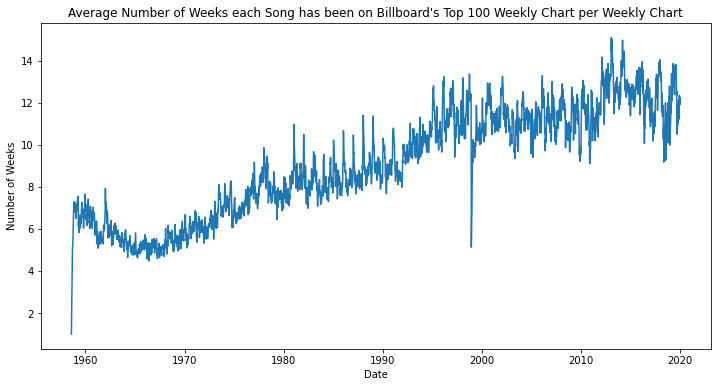

In [61]:
average = df1.groupby('WeekID').mean().sort_values('WeekID', ascending=True)
#median = df1.groupby('WeekID').median().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks each Song has been on Billboard's Top 100 Weekly Chart per Weekly Chart")
plt.plot(average['Weeks on Chart']);

So there are a couple things we notice on this graph. First, there's that initial jump. The first few charts had no significant values for "Weeks on Chart". That is, all songs on the first chart had been on the charts 1 week. The second week was a mix of 1 and 2 weeks, etc.

Second, I'm quite surprised by the very clear upward trend. It seems like songs are spending longer on the chart but. The volatility may just be explained by the increase in number of weeks.

Last, that dip just before 2000 is unusual. It's so short though, maybe a few weeks. I'm going to ignore it for the time being.

Let's also long at staying power of top 10 songs vs bottom 50 songs.

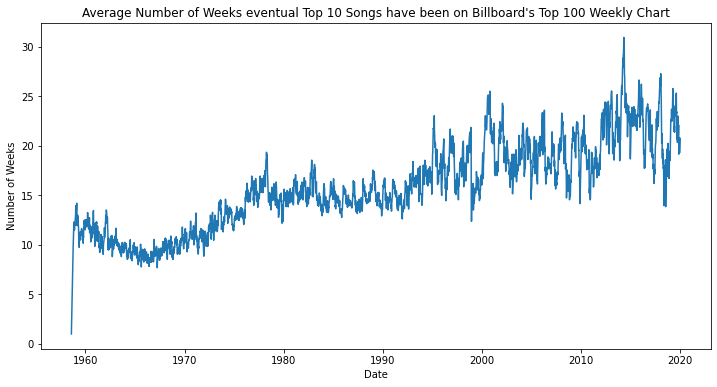

In [62]:
top_10_mean = df1[df1['Peak Position'] <=10].groupby('WeekID').mean().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks eventual Top 10 Songs have been on Billboard's Top 100 Weekly Chart")
plt.plot(top_10_mean['Weeks on Chart']);

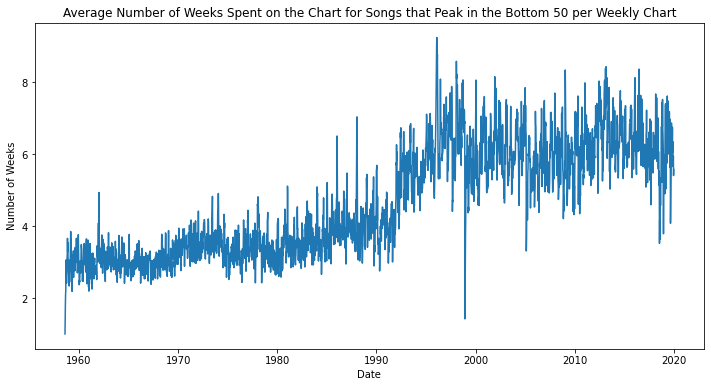

In [63]:
bottom_50_mean = df1[df1['Peak Position'] >=50].groupby('WeekID').mean().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks Spent on the Chart for Songs that Peak in the Bottom 50 per Weekly Chart")
plt.plot(bottom_50_mean['Weeks on Chart']);

I think this is an interesting graph. From 1960 through 1992 or so, we see the staying power of eventual bottom 50 songs is pretty constant. From 1992ish until 1995 or so their time spent on the chart starts to rise. Then in 1995 or so it levels out again. A small poke around the internet (that is, Wikipedia) revelease a little bit of industry shakeup. 

SONY bought out in 1988 and rebranded in 1991 another major label. 
Warner Music Group dealt with a ton of internal drama through the 90s that settled by 96 or so. This looks like a really interesting time period to do more research on. Somewhere in there we may find some reasons for why those bottom 50 songs went from 2-3 weeks on the charts to 4-6 weeks on the charts.

In [0]:
#new_df1 = df1.groupby('SongID').agg({'WeekID':'max', 'Peak Position':'min', 'Weeks on Chart':'max' })[['WeekID', 'Peak Position','Weeks on Chart']].reset_index()

In [0]:
#print(new_df1.isnull().sum())
#print(len(new_df1))
#new_df1.head()

# 2: Explore musicality

Let's load our dataframe that's converted things like acousticness and speachiness to a number as well as listen to a few examples and get a sense of those measurements.

In [66]:
df2 = pd.read_excel("https://query.data.world/s/i3nlbm2tqich6icwnp25de3gtph2xw")
df2.head()
len(df2)

28492

In [67]:
df2.isnull().sum()


SongID                           0
Performer                        0
Song                             0
spotify_genre                 1232
spotify_track_id              4749
spotify_track_preview_url    14328
spotify_track_album           4755
spotify_track_explicit        4749
spotify_track_duration_ms     4749
spotify_track_popularity      4749
danceability                  4812
energy                        4812
key                           4812
loudness                      4812
mode                          4812
speechiness                   4812
acousticness                  4812
instrumentalness              4812
liveness                      4812
valence                       4812
tempo                         4812
time_signature                4812
dtype: int64

Half the songs don't have a spotify url, nor is it that interesting of a feature, so I'll just drop that column, as well as some of the other spotify information.

There's a lot of missing information across danceability through time signature though. I'll drop missing values and hope that nearly all of thsoe missing values correlate with each other.

In [0]:
genres = df2['spotify_genre'] #let's save this for later
df2 = df2.drop(columns= ['Performer', 'Song', 'spotify_track_preview_url','spotify_track_id', 'spotify_track_album'])


In [69]:
df2.isnull().sum()

SongID                          0
spotify_genre                1232
spotify_track_explicit       4749
spotify_track_duration_ms    4749
spotify_track_popularity     4749
danceability                 4812
energy                       4812
key                          4812
loudness                     4812
mode                         4812
speechiness                  4812
acousticness                 4812
instrumentalness             4812
liveness                     4812
valence                      4812
tempo                        4812
time_signature               4812
dtype: int64

In [0]:
df2=df2.dropna()

In [71]:
genres = df2['spotify_genre']
len(df2)

23565

So, we're at 23565 entries, down from 28492. We've lost 4927 data points which doesn't seem bad. We were going to lose at least 4812 from missing entries in the features we were interested in and we're only out 115 more than that.

Let's explore some of these features we're interested in.

Acousticness:	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Acoustic: (of popular music or musical instruments) not having electrical amplification.

So we should be looking at audio fairly devoid of any electrical effects or amplification.

In [72]:
df2.sort_values('acousticness', ascending=False)[:10]

,SongID,spotify_genre,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
11827,ExodusFerrante & Teicher,"['adult standards', 'easy listening', 'exotica...",0.0,190359.0,13.0,0.456,0.2210,2.0,-15.402,0.0,0.0351,0.991,0.882000,0.1850,0.1220,91.562,4.0
19806,StimulationWa Wa Nee,[],0.0,431333.0,13.0,0.634,0.1880,0.0,-16.981,1.0,0.0445,0.990,0.898000,0.1130,0.0742,88.098,4.0
22338,StardustFrank Sinatra,"['adult standards', 'easy listening', 'lounge']",0.0,191533.0,31.0,0.282,0.0181,8.0,-21.097,1.0,0.0337,0.990,0.000032,0.2280,0.1320,70.524,5.0
14141,It's Just A House Without YouBrook Benton,"['adult standards', 'brill building pop', 'mot...",0.0,141613.0,4.0,0.432,0.2180,7.0,-18.305,1.0,0.0677,0.989,0.766000,0.2670,0.6080,111.041,4.0
10854,Stranger On The ShoreMr. Acker Bilk,[],0.0,188973.0,7.0,0.405,0.0201,10.0,-23.027,1.0,0.0376,0.988,0.888000,0.1110,0.2710,77.951,4.0
15603,Afternoon DelightStarland Vocal Band,"['bubblegum pop', 'soft rock']",0.0,219673.0,17.0,0.561,0.2530,4.0,-15.306,1.0,0.0454,0.988,0.916000,0.0947,0.1970,145.845,4.0
14000,Nothing But GoodHank Ballard And The Midnighters,"['doo-wop', 'rhythm and blues']",0.0,159773.0,1.0,0.501,0.6410,2.0,-6.982,1.0,0.0331,0.988,0.486000,0.3120,0.7290,102.010,4.0
27071,"Theme From ""Close Encounters Of The Third Kind...",['soundtrack'],0.0,499693.0,0.0,0.344,0.0627,7.0,-22.933,1.0,0.0327,0.988,0.853000,0.2610,0.0364,95.993,4.0
19711,Thank You BabyThe Shirelles,"['adult standards', 'brill building pop', 'cla...",0.0,156026.0,8.0,0.706,0.1510,6.0,-19.914,1.0,0.0413,0.987,0.628000,0.1020,0.6020,102.429,4.0
2906,I Dreamed Of A Hill-Billy HeavenTex Ritter,['cowboy western'],0.0,190914.0,4.0,0.422,0.4500,3.0,-11.292,1.0,0.0362,0.987,0.382000,0.2110,0.5760,126.686,4.0


Ferrante & Teicher, as 2 people playing pianos makes sense. I'm highly suspicious of Simulation by Wa Wa Nee, a very synthetic pop song. Sinatra makes sense, as does most of the rest of these top 15. While Justin Bieber has put out a number of dance songs with electronic influence, Nothing Like Us is actually one of his quieter, more instrumental songs.

So it looks like #2 might just be an outlier.

In [73]:
df2.sort_values('acousticness', ascending=True)[:15]

,SongID,spotify_genre,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
19669,SpeakGodsmack,"['alternative metal', 'groove metal', 'nu meta...",0.0,235933.0,45.0,0.338,0.887,7.0,-6.447,1.0,0.0424,0.000003,0.001380,0.0616,0.561,97.018,4.0
23236,Check My BrainAlice In Chains,"['alternative metal', 'alternative rock', 'gru...",0.0,237906.0,59.0,0.440,0.844,10.0,-3.315,1.0,0.0461,0.000003,0.051400,0.7230,0.304,113.989,4.0
22239,An Honest MistakeThe Bravery,"['alternative dance', 'dance-punk', 'garage ro...",0.0,219706.0,51.0,0.465,0.883,2.0,-4.259,0.0,0.0297,0.000003,0.506000,0.1010,0.644,140.047,4.0
22114,Devil's AngelsDavie Allan And The Arrows,"['classic garage rock', 'surf music']",0.0,100013.0,12.0,0.373,0.673,2.0,-4.494,1.0,0.0308,0.000006,0.916000,0.0990,0.438,126.850,4.0
13909,Here To StayKorn,"['alternative metal', 'funk metal', 'nu metal'...",1.0,270960.0,60.0,0.564,0.947,2.0,-4.998,1.0,0.0448,0.000008,0.828000,0.3730,0.351,100.002,4.0
6431,Easy LivinUriah Heep,"['album rock', 'art rock', 'blues rock', 'clas...",0.0,156626.0,57.0,0.262,0.836,9.0,-7.243,0.0,0.0963,0.000008,0.343000,0.2790,0.463,160.555,4.0
9547,Just Like YouThree Days Grace,"['alternative metal', 'canadian metal', 'canad...",0.0,186893.0,61.0,0.373,0.737,1.0,-5.282,1.0,0.0297,0.000009,0.000000,0.0696,0.565,177.900,4.0
19665,Celebrity SkinHole,"['alternative rock', 'grunge', 'lilith', 'pop ...",0.0,162666.0,66.0,0.438,0.905,9.0,-6.161,1.0,0.0419,0.000009,0.000054,0.3630,0.723,134.163,4.0
5894,AliveP.O.D.,"['alternative metal', 'funk metal', 'nu metal'...",0.0,205026.0,64.0,0.421,0.950,10.0,-3.985,1.0,0.0768,0.000012,0.000214,0.3140,0.553,80.912,4.0
21043,Reach For The SkyFirehouse,"['album rock', 'glam metal', 'hard rock', 'rock']",0.0,286733.0,44.0,0.562,0.891,1.0,-8.283,1.0,0.0361,0.000012,0.058800,0.0858,0.524,132.569,4.0


And this seems to be a pretty good sign. We see a lot of rock and metal, so we're talking electric guitars with distortion, and then a few pop songs at the end.

In [74]:
df2.sort_values('speechiness', ascending=False)[:5]

,SongID,spotify_genre,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
23140,Ajax AirlinesHudson and Landry,[],0.0,239893.0,5.0,0.527,0.490,5.0,-18.529,1.0,0.924,0.924,0.000000,0.923,0.708,74.777,4.0
5859,Ajax Liquor StoreHudson and Landry,[],0.0,174826.0,8.0,0.725,0.396,10.0,-13.202,1.0,0.913,0.941,0.000000,0.873,0.821,64.569,4.0
23816,"Trouble Me10,000 Maniacs","['alternative metal', 'christian rock', 'nu me...",1.0,90950.0,0.0,0.678,0.470,1.0,-8.363,1.0,0.894,0.720,0.000829,0.119,0.667,81.648,4.0
16560,Grandmother's SongSteve Martin,"['clean comedy', 'comedy', 'comic', 'progressi...",0.0,215866.0,16.0,0.497,0.595,2.0,-10.780,0.0,0.858,0.813,0.000000,0.662,0.519,139.213,4.0
21799,"Blah, Blah, BlahNicola Paone",[],0.0,159346.0,1.0,0.653,0.179,0.0,-17.542,1.0,0.855,0.836,0.000000,0.109,0.611,114.135,5.0


The first song is a country song which is a little weird but the next few entries make more sense. Hudson and Landry are a comedy duo, Steve Martin is more comedy, those should be here. We'll also note those comedy bits are high on acousticness as well.

In [75]:
corr_df = df2.corr()
corr_df

,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
spotify_track_explicit,1.000000,0.058768,0.328945,0.279938,0.075341,0.018049,0.227744,-0.140769,0.531674,-0.190454,-0.068879,0.013983,-0.150851,0.004233,0.073553
spotify_track_duration_ms,0.058768,1.000000,0.199199,0.093993,0.126965,0.010974,0.039763,-0.126521,0.046270,-0.297410,0.018844,-0.035063,-0.150789,-0.016116,0.073590
spotify_track_popularity,0.328945,0.199199,1.000000,0.176062,0.180156,0.003694,0.343914,-0.115874,0.205348,-0.307961,-0.115370,-0.071981,-0.208624,0.025238,0.112708
danceability,0.279938,0.093993,0.176062,1.000000,0.204645,0.014133,0.132719,-0.158795,0.248733,-0.313363,0.001029,-0.129920,0.395430,-0.152206,0.223568
energy,0.075341,0.126965,0.180156,0.204645,1.000000,0.021542,0.685868,-0.103887,0.141123,-0.587538,-0.000398,0.110510,0.356001,0.161143,0.230022
key,0.018049,0.010974,0.003694,0.014133,0.021542,1.000000,0.009299,-0.144589,0.025976,-0.022660,0.003172,-0.002051,0.010014,-0.013938,0.008031
loudness,0.227744,0.039763,0.343914,0.132719,0.685868,0.009299,1.000000,-0.079716,0.172307,-0.405988,-0.131452,0.042932,0.022291,0.093363,0.122206
mode,-0.140769,-0.126521,-0.115874,-0.158795,-0.103887,-0.144589,-0.079716,1.000000,-0.132574,0.143285,-0.010546,0.013654,-0.019753,0.020619,-0.058257
speechiness,0.531674,0.046270,0.205348,0.248733,0.141123,0.025976,0.172307,-0.132574,1.000000,-0.156989,-0.057060,0.078742,-0.021400,0.055557,0.086535
acousticness,-0.190454,-0.297410,-0.307961,-0.313363,-0.587538,-0.022660,-0.405988,0.143285,-0.156989,1.000000,0.026468,0.042148,-0.122886,-0.104112,-0.217331


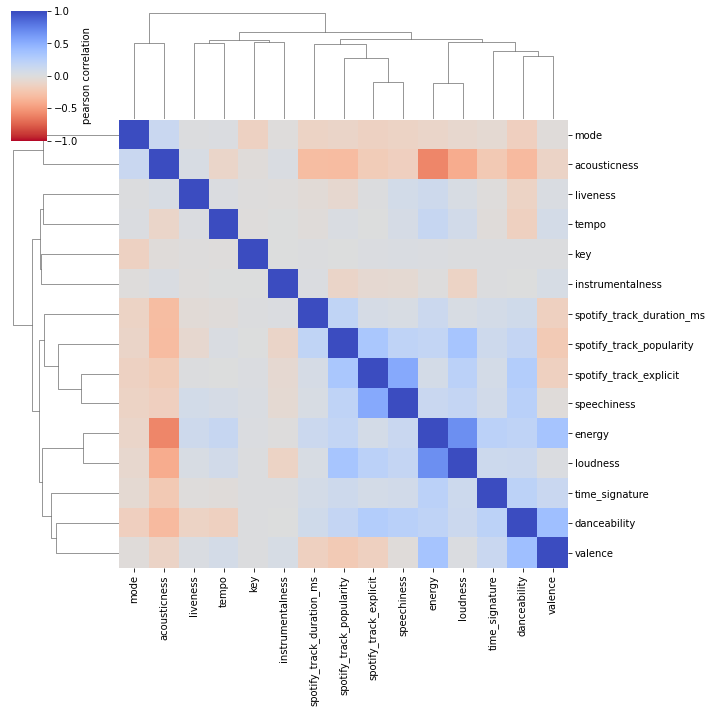

In [76]:
sns.clustermap(
    corr_df,
    vmin=-1,
    vmax=1,
    cmap='coolwarm_r',
    cbar_kws={'label': 'pearson correlation'}
);

This heatmap is pretty interesting. We notice the following correlations among features:

4 and 6: strong positive, 0 and 8: slight positive, 4 and 9: strong negative

So let's see what those features are:

0 - explicit

8 - speechiness

9 - acousticness

4 - energy

6 - loudness

It might not be totally surprising that loudness and energy have strong positive correlation while energy and acousticness (as well as acousticness and loudness) have negative correlations. As per explicit and speechiness, I have a hunch and I might look at genres to see what's there.

Now let's merge this onto our first dataframe and add these measures of musicality for our chart info.


In [77]:
merged_left = df1.merge(right=df2)
merged_left['spotify_track_duration_ms']=merged_left['spotify_track_duration_ms']/1000
merged_left.rename(columns={'spotify_track_duration_ms':'spotify_track_duration_seconds'})


,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_genre,spotify_track_explicit,spotify_track_duration_seconds,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,https://www.billboard.com/charts/hot-100/2019-...,2019-02-02,1,7 Rings,Ariana Grande,7 RingsAriana Grande,1,NaN,1,1,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
1,https://www.billboard.com/charts/hot-100/2019-...,2019-05-25,11,7 Rings,Ariana Grande,7 RingsAriana Grande,1,10.0,1,17,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
2,https://www.billboard.com/charts/hot-100/2019-...,2019-04-20,4,7 Rings,Ariana Grande,7 RingsAriana Grande,1,3.0,1,12,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
3,https://www.billboard.com/charts/hot-100/2019-...,2019-06-01,12,7 Rings,Ariana Grande,7 RingsAriana Grande,1,11.0,1,18,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
4,https://www.billboard.com/charts/hot-100/2019-...,2019-03-30,1,7 Rings,Ariana Grande,7 RingsAriana Grande,1,1.0,1,9,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278637,http://www.billboard.com/charts/hot-100/1962-0...,1962-08-25,18,What's A Matter Baby (Is It Hurting You),Timi Yuro,What's A Matter Baby (Is It Hurting You)Timi Yuro,1,23.0,18,7,"['adult standards', 'brill building pop']",0.0,165.560,26.0,0.685,0.760,9.0,-9.354,1.0,0.043,0.430,0.0,0.0704,0.895,113.569,4.0
278638,http://www.billboard.com/charts/hot-100/1962-0...,1962-09-01,12,What's A Matter Baby (Is It Hurting You),Timi Yuro,What's A Matter Baby (Is It Hurting You)Timi Yuro,1,18.0,12,8,"['adult standards', 'brill building pop']",0.0,165.560,26.0,0.685,0.760,9.0,-9.354,1.0,0.043,0.430,0.0,0.0704,0.895,113.569,4.0
278639,http://www.billboard.com/charts/hot-100/1962-0...,1962-09-08,14,What's A Matter Baby (Is It Hurting You),Timi Yuro,What's A Matter Baby (Is It Hurting You)Timi Yuro,1,12.0,12,9,"['adult standards', 'brill building pop']",0.0,165.560,26.0,0.685,0.760,9.0,-9.354,1.0,0.043,0.430,0.0,0.0704,0.895,113.569,4.0
278640,http://www.billboard.com/charts/hot-100/1962-0...,1962-09-15,31,What's A Matter Baby (Is It Hurting You),Timi Yuro,What's A Matter Baby (Is It Hurting You)Timi Yuro,1,14.0,12,10,"['adult standards', 'brill building pop']",0.0,165.560,26.0,0.685,0.760,9.0,-9.354,1.0,0.043,0.430,0.0,0.0704,0.895,113.569,4.0


In [78]:
merged_left.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_genre,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,https://www.billboard.com/charts/hot-100/2019-...,2019-02-02,1,7 Rings,Ariana Grande,7 RingsAriana Grande,1,NaN,1,1,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
1,https://www.billboard.com/charts/hot-100/2019-...,2019-05-25,11,7 Rings,Ariana Grande,7 RingsAriana Grande,1,10.0,1,17,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
2,https://www.billboard.com/charts/hot-100/2019-...,2019-04-20,4,7 Rings,Ariana Grande,7 RingsAriana Grande,1,3.0,1,12,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
3,https://www.billboard.com/charts/hot-100/2019-...,2019-06-01,12,7 Rings,Ariana Grande,7 RingsAriana Grande,1,11.0,1,18,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0
4,https://www.billboard.com/charts/hot-100/2019-...,2019-03-30,1,7 Rings,Ariana Grande,7 RingsAriana Grande,1,1.0,1,9,"['dance pop', 'pop', 'post-teen pop']",1.0,178.626,91.0,0.778,0.317,1.0,-10.732,0.0,0.334,0.592,0.0,0.0881,0.327,140.048,4.0


Now that we've merged both dataframes, let's look at what happens to some of these sound measurements over time!

In [0]:
mean = merged_left.groupby('WeekID').mean().sort_values('WeekID', ascending=True)

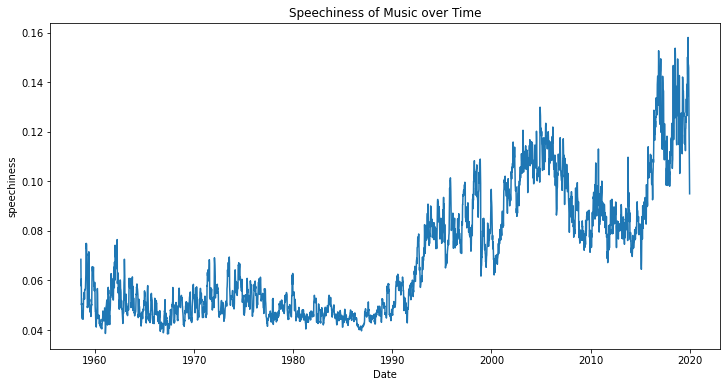

In [80]:
plt.figure(figsize=(12,6))
plt.ylabel('speechiness')
plt.xlabel('Date')
plt.title("Speechiness of Music over Time")
plt.plot(mean['speechiness']);

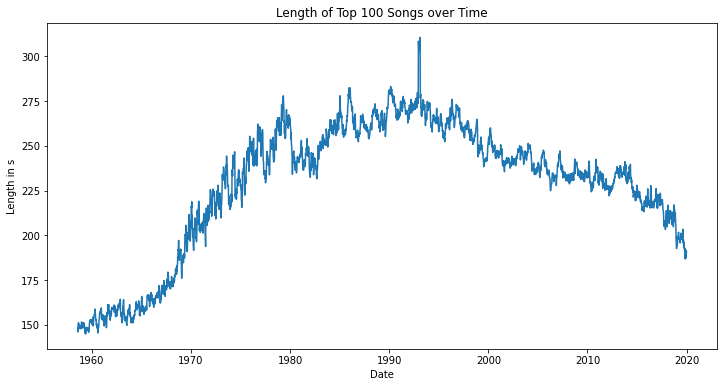

In [81]:
plt.figure(figsize=(12,6))
plt.ylabel('Length in s')
plt.xlabel('Date')
plt.title("Length of Top 100 Songs over Time")
plt.plot(mean['spotify_track_duration_ms']);

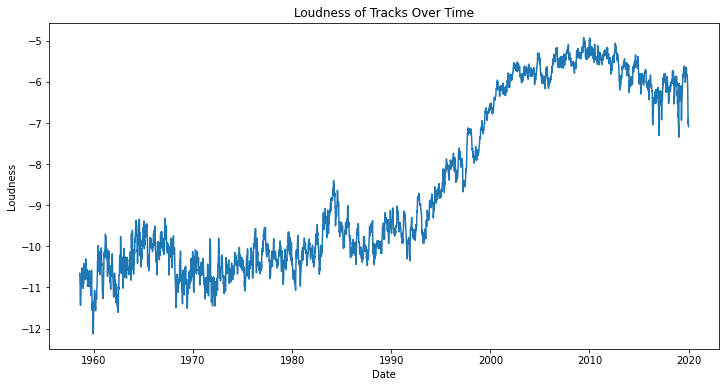

In [82]:
plt.figure(figsize=(12,6))
plt.ylabel('Loudness')
plt.xlabel('Date')
plt.title("Loudness of Tracks Over Time")
plt.plot(mean['loudness']);

# 3: Predict Year Based on Musicality!

## a: Multiple Linear Regression

In [85]:
grouped_df1 = df1.groupby('SongID').agg({'WeekID':'max', 'Peak Position':'min', 'Weeks on Chart':'max' })[['WeekID', 'Peak Position','Weeks on Chart']].reset_index()
merged = df2.merge(grouped_df1)
merged['year'] = pd.DatetimeIndex(merged['WeekID']).year
len(merged)

23564

In [0]:
merged = merged.drop(columns=['spotify_genre', 'WeekID'])
merged = merged.set_index(keys=['SongID'])

,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Peak Position,Weeks on Chart,year
SongID,,,,,,,,,,,,,,,,,,
"AdictoTainy, Anuel AA & Ozuna",0.0,270740.0,91.0,0.734,0.836,10.0,-4.803,0.0,0.0735,0.017000,0.000016,0.1790,0.623,80.002,4.0,86,2,2019
ShallowLady Gaga & Bradley Cooper,0.0,215733.0,88.0,0.572,0.385,7.0,-6.362,1.0,0.0308,0.371000,0.000000,0.2310,0.323,95.799,4.0,1,45,2019
ShallowLady Gaga & Bradley Cooper,0.0,215733.0,89.0,0.572,0.385,7.0,-6.362,1.0,0.0308,0.371000,0.000000,0.2310,0.323,95.799,4.0,1,45,2019
EnemiesPost Malone Featuring DaBaby,1.0,196760.0,86.0,0.542,0.674,6.0,-4.169,1.0,0.2100,0.058800,0.000000,0.0955,0.667,76.388,4.0,16,15,2019
"Bacc At It AgainYella Beezy, Gucci Mane & Quavo",1.0,228185.0,61.0,0.948,0.623,8.0,-5.725,0.0,0.1680,0.001240,0.000001,0.0716,0.856,135.979,4.0,78,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tonight, Tonight, TonightGenesis",0.0,530560.0,42.0,0.571,0.502,7.0,-14.405,1.0,0.0303,0.015800,0.014000,0.0849,0.316,98.058,4.0,3,15,1987
"Tonight, TonightThe Smashing Pumpkins",0.0,254626.0,69.0,0.287,0.670,6.0,-9.381,1.0,0.0368,0.000063,0.748000,0.2370,0.222,148.928,4.0,36,20,1996
Tonight's The Night (Gonna Be Alright)Rod Stewart,0.0,237120.0,55.0,0.550,0.514,11.0,-12.617,1.0,0.0523,0.336000,0.125000,0.3820,0.724,136.542,3.0,1,23,1977


In [0]:
merged_top_30 = merged[merged['Peak Position'] <= 30]
X = merged_top_30.drop('year',axis=1).values
y = merged_top_30['year'].values

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.linear_model import LinearRegression

In [115]:
reg = LinearRegression().fit(X_train, y_train)
print('The coefficient of determination on the train data is', reg.score(X_train, y_train))
print('The coefficient of determination on the test data is', reg.score(X_test, y_test))


The coefficient of determination on the train data is 0.715188257617313
The coefficient of determination on the test data is 0.7157398723420325


In [0]:
reg_pred = reg.predict(X_test)

## b: Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
clf = RandomForestRegressor(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [176]:
clf.score(X_test,y_test)

0.8189503845085189

In [0]:
rf_pred = clf.predict(X_test)

## c: Deep Learning with Sequential Neural Network

In [0]:
import tensorflow as tf
import keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [0]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [0]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=750)

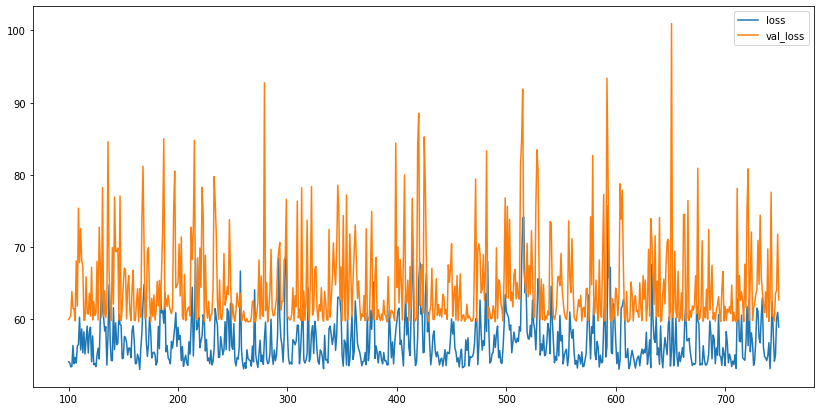

In [134]:
losses = pd.DataFrame(model.history.history)[100:]
losses.plot(figsize=(14,7));

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [0]:
X_test
nn_pred= model.predict(X_test)
mean_squared_error(y_test,nn_pred)
nn_pred = nn_pred.flatten()

In [0]:
comparison = pd.DataFrame()

In [0]:
comparison['NN Predictions']=nn_pred
comparison['Reg Predictions']=reg_pred
comparison['RF Predictions']=rf_pred
comparison['Actual']=y_test

In [190]:
comparison.head()

,NN Predictions,Reg Predictions,RF Predictions,Actual
0,1972.542603,1975.497462,1967.1,1976
1,2004.140869,1998.510385,1986.8,2011
2,1998.487671,2005.277409,1995.9,1993
3,1974.504272,1982.328792,1969.7,1985
4,2011.665039,2031.579929,2013.0,2017


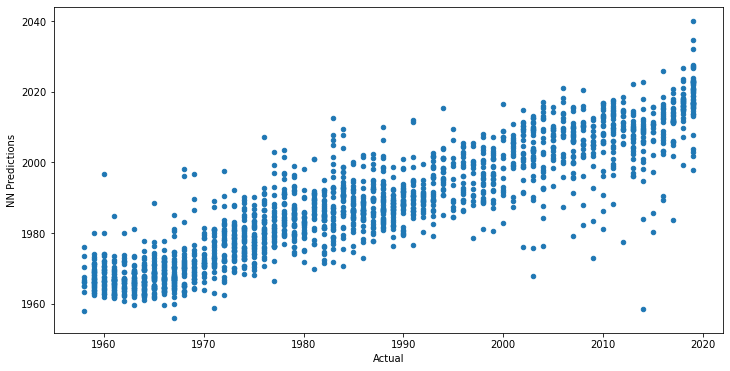

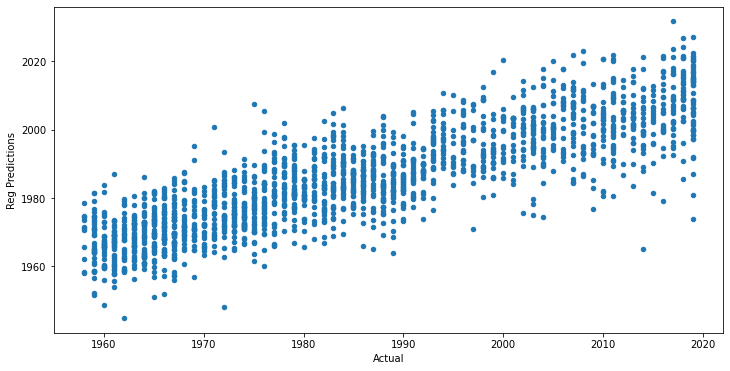

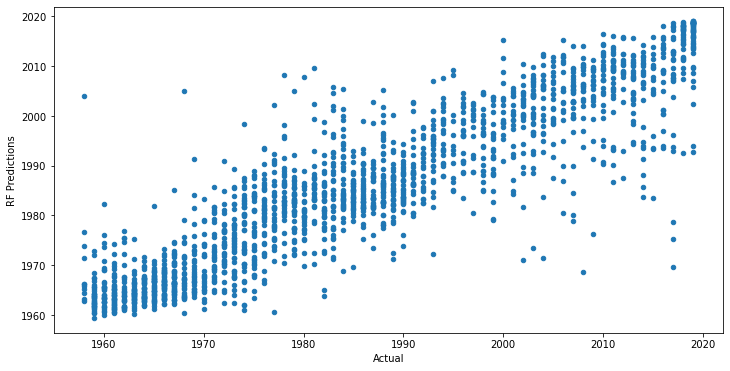

In [191]:
comparison.plot.scatter(x='Actual', y='NN Predictions', figsize=(12,6))
comparison.plot.scatter(x='Actual', y='Reg Predictions', figsize=(12,6));
comparison.plot.scatter(x='Actual', y='RF Predictions', figsize=(12,6))

# 4: Conclusions

So first, it was interesting to see some of the data broken down by year at the start of the analysis. In particular I didn't expect the trend for song length! I was also surprised by the fact that top songs spend more time on the charts now than they did in the past.


To train my predictive model I only used the top 30 songs  We predicted the year for the validation set of songs and notice the model is off by .2 years on average. That doesn't sound terrible, but a standard deviation of 9.19 is pretty bad! Also the model seems to be quite bad at the ends of the model, predicting one song to have originated in 1942 and another in 2034. Perhaps I can make the model more accurate by tightening the years a bit.

In [0]:
len(comparison[comparison['Difference'] < 5])

783

In [0]:
len(comparison)

1382